## <b><center> LAB 5 - Cross-Validation for Model Selection</center></b>
<center> AARDRAN PREMAKUMAR <BR> 8844491 </center> 

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [3]:
# loading the dataset
df = load_diabetes()
X = df.data
y = df.target

In [4]:
# function defined to do cross validation on polynomial model
def crossValPolyModel (degree):
    polyFeature = PolynomialFeatures(degree = degree)
    polyX = polyFeature.fit_transform(X)
    polyModel = LinearRegression()
    r2Score = cross_val_score(polyModel, polyX, y, cv = 5, scoring = 'r2')
    maeScore = cross_val_score(polyModel, polyX, y, cv = 5, scoring = 'neg_mean_absolute_error')
    mapeScore = cross_val_score(polyModel, polyX, y, cv = 5, scoring = 'neg_mean_absolute_percentage_error')
    return np.mean(r2Score), np.mean(maeScore), np.mean(mapeScore)

In [5]:
# empty list to store the results
Result = []
# executing the cross validation for polynomial models of degree 0 to 8
for degree in range(9):
    rSquare, mae, mape = crossValPolyModel(degree)
    Result.append([degree, rSquare, abs(mae), abs(mape)])

In [13]:
# converting the result to data frame (table)
df_Result = pd.DataFrame(Result, columns = ['Degree', 'R Squared', 'MAE', 'MAPE'])

# dataset copied to plot the graph 
df_table = df_Result.copy()

# calculating the mean and standard deviation of the result
meanValue = df_Result.mean()
stdValue = df_Result.std()

# adding the mean and standard deviation to the result table
df_Result.loc['mean'] = meanValue
df_Result.loc['std'] = stdValue

display(df_Result)

,Degree,R Squared,MAE,MAPE
0,0.000000,-0.027506,66.045624,0.623622
1,1.000000,0.482316,44.276499,0.394860
2,2.000000,0.391502,46.612882,0.402669
3,3.000000,-181.520036,342.740488,2.327479
4,4.000000,-70.667516,303.158461,2.453685
5,5.000000,-67.387407,295.686026,2.405233
6,6.000000,-67.447482,295.631865,2.404954
7,7.000000,-67.448529,295.630403,2.404952
8,8.000000,-67.442248,295.580633,2.404587
mean,4.000000,-57.896323,220.595876,1.758005


In [14]:
# finding the best model
# combinedSum = df_Result['R Squared'] + df_Result['MAE'] + df_Result['MAPE']


bestModel = df_table.loc[df_table['R Squared'].idxmax()]


bm = "The best model with degree {} shows the peak performance according R Square, MAE, & MAPE values.".format(bestModel['Degree'])
print(bm)

The best model with degree 1.0 shows the peak performance according R Square, MAE, & MAPE values.


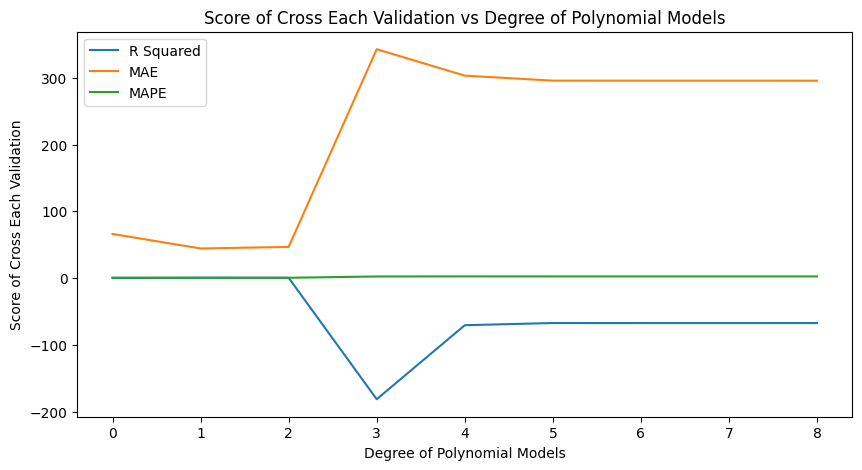

In [19]:
# plotting the result of cross validation vs degree of polynomial models
plt.figure(figsize = (10, 5))
plt.plot(df_table['Degree'], df_table['R Squared'], label = 'R Squared')
plt.plot(df_table['Degree'], df_table['MAE'], label = 'MAE')
plt.plot(df_table['Degree'], df_table['MAPE'], label = 'MAPE')
plt.xlabel('Degree of Polynomial Models')
plt.ylabel('Score of Cross Each Validation')
plt.title('Score of Cross Each Validation vs Degree of Polynomial Models')
plt.legend()
plt.show()

From analyzing the graph plotted, Polynomial Model with Degree 1 gives us the best performance since, the R-Squared value of this model is the highest and the MAE and MAPE values of this model is the least. A polynomial model can be called with best performance when the r-squared value is higher and both mae and mape values should be the lowest. 

Polynomial Model with the lowest performance: Degree = 3